In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.metrics import Accuracy, Recall, Precision, AUC, TruePositives, TrueNegatives, FalseNegatives, FalsePositives
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf # Imports tensorflow


# from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, LSTM,Bidirectional,Attention,Concatenate
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, Bidirectional,Attention,Concatenate

from tensorflow.keras import regularizers, optimizers,losses
from tensorflow.keras.metrics import Accuracy,Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives, SpecificityAtSensitivity,SensitivityAtSpecificity
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
#import imblearn
#from keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
import os
import sklearn.metrics as m
from glob import glob
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import skimage.io
import skimage.color
import skimage.filters
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [4]:
images=[]
masks=[]
y=[]
gr_shape=(128,128,1)
img_shape = (128,128,3)
input_dir="LIDC-IDRI-slices"
out_dir = "lidc_kaggle/output"

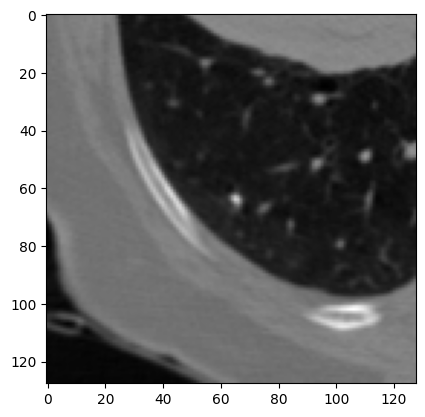

In [5]:
img=image.load_img('LIDC-IDRI-slices/LIDC-IDRI-0004/nodule-0/images/slice-1.png')
plt.imshow(img)
plt.show()

In [6]:
np.asarray(img).shape

(128, 128, 3)

In [7]:
np.array(images).shape

(0,)

In [9]:
np.array(masks).shape

(0,)

In [10]:
images=[]

y=[]
for nodule in os.listdir('LIDC-IDRI-slices/LIDC-IDRI-0001'):
        mask0=[]
        mask1=[]
        mask2=[]
        mask3=[]
        for filename in glob('LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/images/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            images.append(img)
        for filename in glob('LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-0/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask0.append(img)
        for filename in glob('LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-1/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask1.append(img)
        for filename in glob('LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-2/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask2.append(img)
        for filename in glob('LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-3/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask3.append(img)


LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-0.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-1.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-2.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-3.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-4.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-5.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-6.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-7.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-8.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-0.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-1.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-2.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-3.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-4.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-5.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-6.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0

In [11]:
i=7
print(mask0[i].sum())
print(mask1[i].sum())
print(mask2[i].sum())
print(mask3[i].sum())

465885
230265
292995
364905


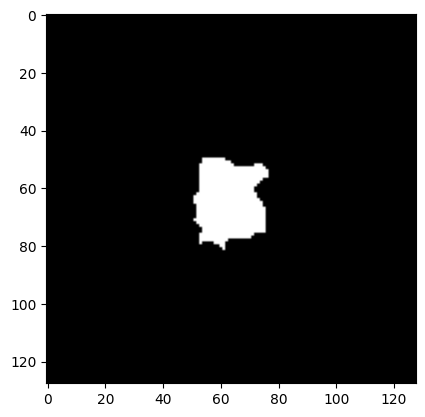

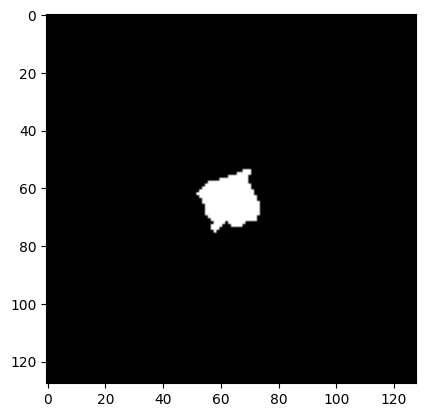

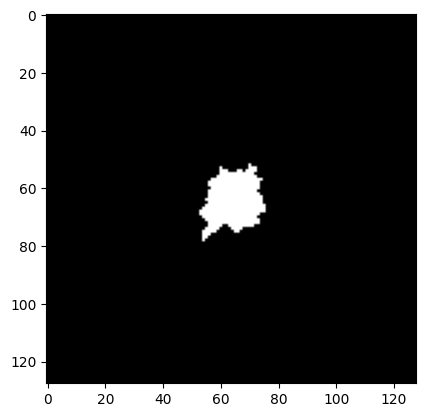

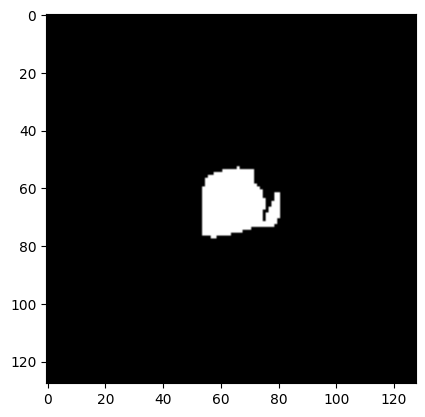

In [12]:
plt.imshow(mask0[i])
plt.show()
plt.imshow(mask1[i])
plt.show()
plt.imshow(mask2[i])
plt.show()
plt.imshow(mask3[i])
plt.show()

In [13]:
Thres = 100000

In [14]:
gmask=[]
for i in range(len(mask0)):
    white_sum=np.array([mask0[i].sum(),mask1[i].sum(),mask2[i].sum(),mask3[i].sum()])
    cnt=int(mask0[i].sum()>Thres)+int(mask1[i].sum()>Thres)+int(mask2[i].sum()>Thres)+int(mask3[i].sum()>Thres)
    print(cnt)
    if(cnt>2):
        print("ID ="+str(white_sum.argmax()))
        print(white_sum)

3
ID =0
[289935      0 102510 237915]
4
ID =0
[577575 398565 457470 509490]
4
ID =0
[648720 572985 561510 562275]
4
ID =0
[710685 688500 684675 681615]
4
ID =0
[694620 639540 635715 672435]
4
ID =0
[614295 563805 574515 596700]
4
ID =0
[515610 435285 481185 510255]
4
ID =0
[465885 230265 292995 364905]
0


In [15]:
gr_shape=(128,128,1)
img_shape = (128,128,3)
input_dir="LIDC-IDRI-slices"
images=[]
masks=[]
y=[]
y_test = []
y_pred = []
Thres = 1000

In [17]:
for patient in os.listdir(input_dir):
    for nodule in os.listdir(input_dir+'/'+patient):
        mask0=[]
        mask1=[]
        mask2=[]
        mask3=[]
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/images/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            images.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-0/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask0.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-1/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask1.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-2/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask2.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-3/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask3.append(img)
        for i in range(len(mask0)):
            white_sum=np.array([mask0[i].sum(),mask1[i].sum(),mask2[i].sum(),mask3[i].sum()])
            cnt=int(mask0[i].sum()>Thres)+int(mask1[i].sum()>Thres)+int(mask2[i].sum()>Thres)+int(mask3[i].sum()>Thres)
            if(cnt>2):
                y.append(1)
                if white_sum.argmax()==0:
                    masks.append(mask0[i])
                elif white_sum.argmax()==1:
                    masks.append(mask1[i])
                elif white_sum.argmax()==2:
                    masks.append(mask2[i])
                else:
                    masks.append(mask3[i])
            else:
                y.append(0)
                if white_sum.argmin()==0:
                    masks.append(mask0[i])
                elif white_sum.argmin()==1:
                    masks.append(mask1[i])
                elif white_sum.argmin()==2:
                    masks.append(mask2[i])
                else:
                    masks.append(mask3[i])


In [18]:
images = images[0:2500]
masks= masks[0:2500]
y= y[0:2500]

In [19]:
images=np.array(images)
masks=np.array(masks)
label=np.array(y)

In [20]:
print(images.shape)
print(masks.shape)
print(label.shape)

(2500, 128, 128, 3)
(2500, 128, 128, 3)
(2500,)


In [21]:
yy=pd.DataFrame(label)
yy.value_counts()

1    1360
0    1140
Name: count, dtype: int64

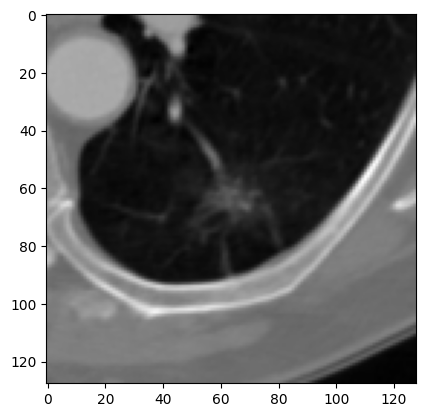

In [18]:
plt.imshow(images[0])

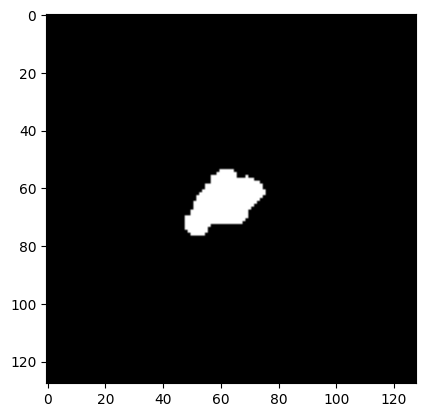

In [19]:
plt.imshow(masks[0])

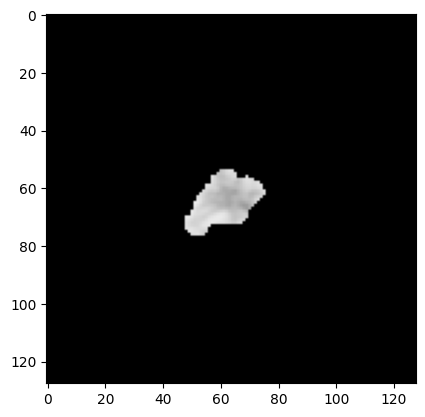

In [20]:
plt.imshow(images[0]*masks[0])

In [22]:
def blockred(inp,filters):
    x = Conv2D(filters, 1, activation="relu",padding='same',use_bias=False)(inp)
    x = layers.MaxPooling2D(2)(x)
    x = BatchNormalization(axis=1)(x)

    y = Conv2D(filters,1,activation="relu", padding='same',use_bias=False,)(inp)
    y = Conv2D(filters,3,activation="relu", padding='same',use_bias=False,)(y)
    y = layers.MaxPooling2D(2)(y)
    y = BatchNormalization(axis=1)(y)
    y = Dropout(0.25)(y)
    z = Conv2D(filters, 3, activation="relu", padding='same',use_bias=False)(inp)
    z = layers.MaxPooling2D(2)(z)
    z = BatchNormalization(axis=1)(z)
    output1 = layers.add([x,y,z])
    return output1

In [23]:

Name = "Seq3cnn"
inputs = keras.Input(shape=img_shape, name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization(axis=-1)(x)
x = Dropout(0.25)(x)

bl1=blockred(x,64)

y = blockred(bl1,128)
y = Conv2D(filters=128, kernel_size=(5, 5), activation='relu')(y)
y = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(y)
y = BatchNormalization(axis=-1)(y)
y = Dropout(0.25)(y)
y = Flatten()(y)
y = Dense(256, activation='relu')(y)
y = Dropout(0.5)(y)
y = Dense(64, activation='relu')(y)
y = Dropout(0.5)(y)

In [25]:

# Rest of your code...

num_classes = 2  # Replace with the actual number of classes in your classification problem

# Load pre-trained EfficientNetB0 model
base_model = EfficientNetB0(weights=r'C:\Users\user\Downloads\Ayesha_4_Model\lidc_irdi_complete_implementation\efficientnetb0_notop.h5', include_top=False, input_shape=img_shape)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of EfficientNetB0
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Rest of your code...


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 128, 128, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 128, 128, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 stem_conv_pad (ZeroPadding  (None, 129, 129, 3)          0         ['normalization_1[0][0]'] 

In [26]:

x_train, x_test, y_train, y_test = train_test_split(images, label, train_size=0.8, random_state=7)
print(x_train.shape)
print(y_train.shape)

# Convert labels to one-hot encoded format
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(2000, 128, 128, 3)
(2000,)


In [27]:


model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
plot_model(model, to_file=Name+'.png', show_shapes=True, show_layer_names=True)
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=64)

# Rest of your code...


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Epoch 1/100
32/32 [==============================] - 315s 9s/step - loss: 0.7507 - accuracy: 0.5420 - val_loss: 0.6608 - val_accuracy: 0.6060
Epoch 2/100
32/32 [==============================] - 380s 12s/step - loss: 0.6797 - accuracy: 0.5750 - val_loss: 0.6492 - val_accuracy: 0.6380
Epoch 3/100
32/32 [==============================] - 483s 15s/step - loss: 0.6433 - accuracy: 0.6120 - val_loss: 0.6294 - val_accuracy: 0.6480
Epoch 4/100
32/32 [==============================] - 537s 17s/step - loss: 0.6357 - accuracy: 0.6305 - val_loss: 0.6195 - val_accuracy: 0.6660
Epoch 5/100
32/32 [==============================] - 513s 16s/step - loss: 0.6103 - accuracy: 0.6575 - val_loss: 0.5808 - val_accuracy: 0.7060
Epoch 6/100
32/32 [==============================] - 545s 17s/step - loss: 0.5933 - accuracy: 0.6850 - val_loss: 0.5801 - val_accuracy: 0.7220
Epoch 7/100
32/32 [==============================] - 590s 19s/step - loss: 0.5452 - accuracy: 0.7065 - val_loss: 0.5402 - val_accuracy: 0.7320


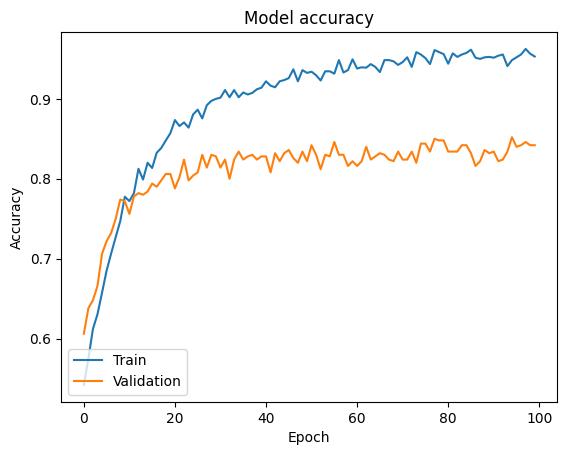

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower left')
plt.savefig(Name+'accuracy.png')
plt.show()

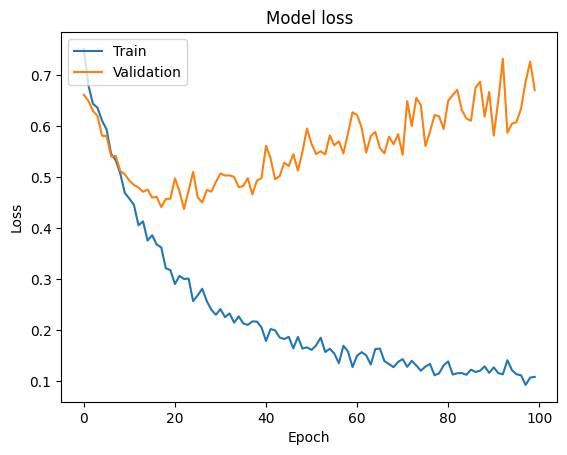

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(Name+'loss.png')
plt.show()

In [30]:
model.save(Name+'.h5')
pd.DataFrame.from_dict(history.history).to_csv(Name+'.csv',index=False)

c:\Users\user\Downloads\Ayesha_4_Model\lidc_irdi_complete_implementation\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
from sklearn.metrics import classification_report
# Make predictions on the test data
y_pred_prob = model.predict(x_test)
y_pred = np.round(y_pred_prob)  # Convert probabilities to class labels (0 or 1)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

16/16 [==============================] - 7s 466ms/step
              precision    recall  f1-score   support

           0       0.89      0.75      0.82       236
           1       0.81      0.92      0.86       264

   micro avg       0.84      0.84      0.84       500
   macro avg       0.85      0.84      0.84       500
weighted avg       0.85      0.84      0.84       500
 samples avg       0.84      0.84      0.84       500



16/16 [==============================] - 23s 1s/step


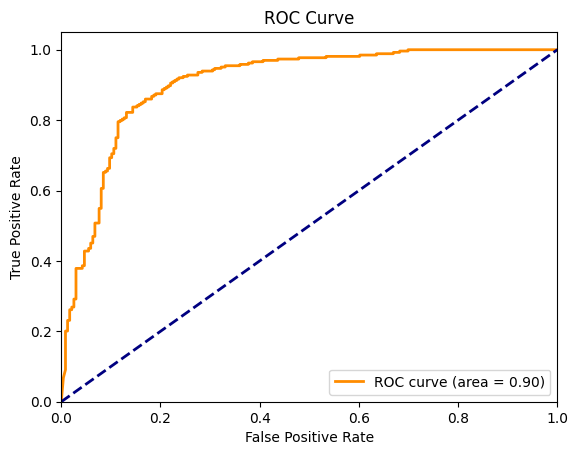

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have already trained your model and obtained predictions on the test set
y_pred_prob = model.predict(x_test)

# Calculate ROC curve and ROC AUC for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test[:, 1], y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


16/16 [==============================] - 9s 567ms/step


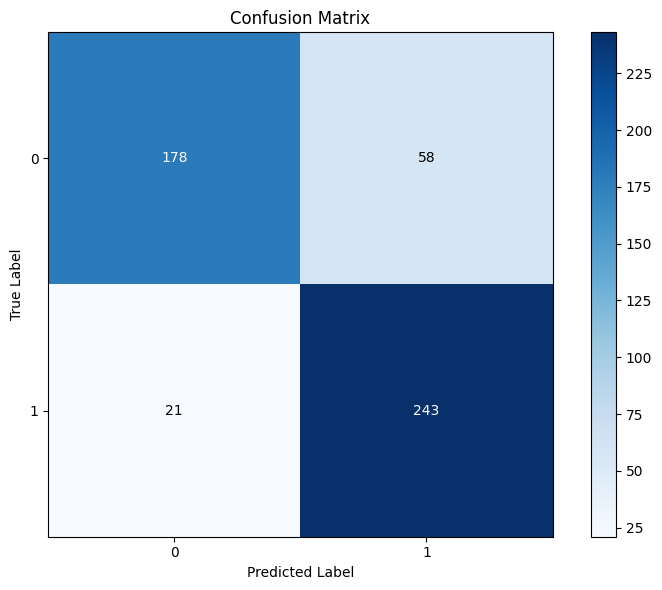

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and obtained predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoded probabilities to class labels

# Convert one-hot encoded true labels back to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mat = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()

# Display confusion matrix values in the heatmap
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(confusion_mat[i, j]), ha='center', va='center', color='white' if i == j else 'black')

plt.show()
